In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import os, shutil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
#ML
from sklearn.svm import SVC, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawdata.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,11.0,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Preprocessing

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- PassengerId, Name, Ticket 의미 없는 컬럼 삭제

In [ ]:
data=data.drop(['PassengerId','Name', 'Ticket'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


- Categorical Columns : Pclass, Sex, SibSp, Parch, Embarked
- Numerical Column : Age, Fare

## Sex
- 인코딩
- female=0, male=1

In [ ]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


## Embarked
- 인코딩
- S=0, C=1, Q=2

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])
data.Embarked.value_counts()

0    644
1    168
2     77
Name: Embarked, dtype: int64

## Fare

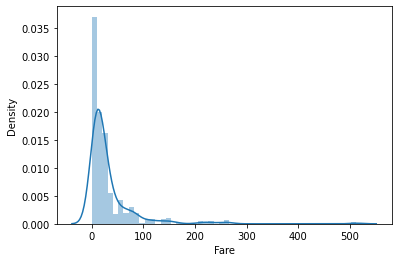

In [ ]:
sns.distplot(data.Fare)

In [ ]:
data['Fare_log']=np.log1p(data['Fare'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,0,3,1,22.0,1,0,7.2500,0,2.110213
1,1,1,0,38.0,1,0,71.2833,1,4.280593
2,1,3,0,26.0,0,0,7.9250,0,2.188856
3,1,1,0,35.0,1,0,53.1000,0,3.990834
4,0,3,1,35.0,0,0,8.0500,0,2.202765


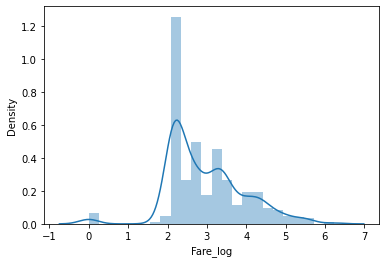

In [ ]:
sns.distplot(data['Fare_log'])

In [ ]:
data=data.drop(['Fare'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,1,22.0,1,0,0,2.110213
1,1,1,0,38.0,1,0,1,4.280593


## 가족

In [ ]:
data['Famsize']=data['Parch']+data['SibSp']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize
0,0,3,1,22.0,1,0,0,2.110213,1
1,1,1,0,38.0,1,0,1,4.280593,1
2,1,3,0,26.0,0,0,0,2.188856,0
3,1,1,0,35.0,1,0,0,3.990834,1
4,0,3,1,35.0,0,0,0,2.202765,0


## Test

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
test['Fare_log']=np.log1p(test['Fare'])
test=test.drop(['Fare'], axis=1)
test['Famsize']=test['Parch']+test['SibSp']
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked']=test['Embarked'].replace(['S','C','Q'],[0,1,2])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_log,Famsize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2,2.178064,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,0,2.079442,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2,2.369075,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,0,2.268252,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,0,2.586824,2
...,...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",1,32.0,0,0,A.5. 3236,0,2.202765,0
413,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,1,4.699571,0
414,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,0,2.110213,0
415,1308,3,"Ware, Mr. Frederick",1,32.0,0,0,359309,0,2.202765,0


In [ ]:
test=test.drop(['PassengerId','Name', 'Ticket'], axis=1)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize
0,3,1,34.5,0,0,2,2.178064,0
1,3,0,47.0,1,0,0,2.079442,1
2,2,1,62.0,0,0,2,2.369075,0
3,3,1,27.0,0,0,0,2.268252,0
4,3,0,22.0,1,1,0,2.586824,2
...,...,...,...,...,...,...,...,...
412,3,1,32.0,0,0,0,2.202765,0
413,1,0,39.0,0,0,1,4.699571,0
414,3,1,38.5,0,0,0,2.110213,0
415,3,1,32.0,0,0,0,2.202765,0


# XGBoost
- 0.85

In [ ]:
x=data.drop(columns=['Survived'])
y=data['Survived']

In [ ]:
x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)

In [ ]:
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'objective': ['binary:hinge']
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5)
results=search.fit(x_train, y_train)

In [ ]:
print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'max_depth': 3, 'num_boost_rounds': 100, 'objective': 'binary:hinge'}
0.7956632890752388


In [ ]:
yhat_train = best_model.predict(x_train)
yhat_val = best_model.predict(x_val)

In [ ]:
print( classification_report( y_train, yhat_train) )

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       401
           1       0.84      0.78      0.81       265

    accuracy                           0.85       666
   macro avg       0.85      0.84      0.85       666
weighted avg       0.85      0.85      0.85       666



In [ ]:
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       148
           1       0.83      0.71      0.76        75

    accuracy                           0.85       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223



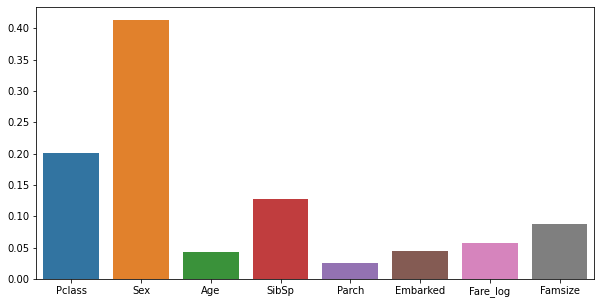

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

#LGBM
- acc: 0.78

In [ ]:
params = {
  'learning_rate': [0.01, 0.005, 0.001],
  'num_iterations ': [100,200,300],
  'max_depth': [3, 5, 7, 9, 11],
  'objective': ['binary']
}

model = lgb.LGBMClassifier()
search = GridSearchCV( model, param_grid=params, scoring='roc_auc', cv=15)
results = search.fit( x_train, y_train )

In [ ]:
print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'learning_rate': 0.005, 'max_depth': 7, 'num_iterations ': 100, 'objective': 'binary'}
0.8731288400133715


In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       409
           1       0.93      0.54      0.69       257

    accuracy                           0.81       666
   macro avg       0.85      0.76      0.78       666
weighted avg       0.84      0.81      0.80       666

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       140
           1       0.86      0.51      0.64        83

    accuracy                           0.78       223
   macro avg       0.81      0.73      0.74       223
weighted avg       0.80      0.78      0.77       223



# 램덤포레스트
- acc : 0.82

In [ ]:
params = {
  'criterion': ['gini', 'entropy'],
  'n_estimators': [50, 100, 300, 500, 1000],
  'max_depth': [1,3, 5, 7, 9, 11, 13, 15],
  'min_samples_split': [8, 16, 20],
  'min_samples_leaf': [8, 12, 18],
}

model = RandomForestClassifier()
search = GridSearchCV( model, param_grid=params, scoring='roc_auc', cv=10)
results = search.fit( x_train, y_train )

In [ ]:
print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
0.8803133208255158


In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       409
           1       0.91      0.71      0.80       257

    accuracy                           0.86       666
   macro avg       0.87      0.83      0.85       666
weighted avg       0.87      0.86      0.86       666

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       140
           1       0.82      0.65      0.72        83

    accuracy                           0.82       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.82      0.81       223



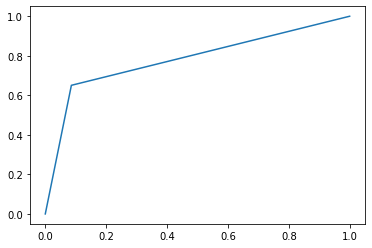

In [ ]:
fpr, tpr, _ = roc_curve(y_val, yhat_val)
plt.plot( fpr, tpr )

# Catboost
- acc:0.82

In [ ]:
model = cb.CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.008661
0:	learn: 0.6875483	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6825654	total: 2.55ms	remaining: 1.27s
2:	learn: 0.6767925	total: 3.74ms	remaining: 1.24s
3:	learn: 0.6724238	total: 4.64ms	remaining: 1.15s
4:	learn: 0.6666068	total: 5.91ms	remaining: 1.18s
5:	learn: 0.6614136	total: 7.21ms	remaining: 1.2s
6:	learn: 0.6558146	total: 8.5ms	remaining: 1.21s
7:	learn: 0.6506522	total: 9.78ms	remaining: 1.21s
8:	learn: 0.6453578	total: 11.1ms	remaining: 1.22s
9:	learn: 0.6409040	total: 12.3ms	remaining: 1.22s
10:	learn: 0.6361824	total: 13.6ms	remaining: 1.22s
11:	learn: 0.6318563	total: 15ms	remaining: 1.24s
12:	learn: 0.6282552	total: 15.8ms	remaining: 1.2s
13:	learn: 0.6237011	total: 17.1ms	remaining: 1.2s
14:	learn: 0.6214111	total: 17.9ms	remaining: 1.17s
15:	learn: 0.6181366	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6134613	total: 20.1ms	remaining: 1.16s
17:	learn: 0.6087277	total: 21.3ms	remaining: 1.16s
18:	learn: 0.6049098	total: 22.5ms	remaining: 1.16

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       415
           1       0.94      0.79      0.86       251

    accuracy                           0.90       666
   macro avg       0.91      0.88      0.89       666
weighted avg       0.91      0.90      0.90       666



In [ ]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



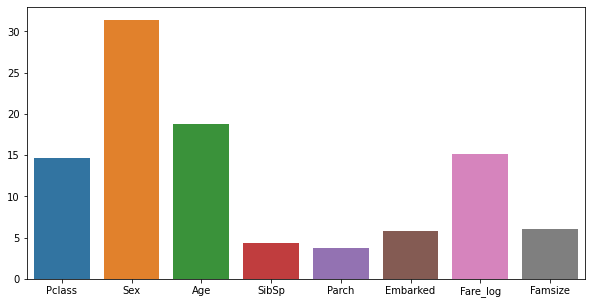

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, model.feature_importances_)

## categorical_feature

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    int64  
 7   Fare_log  889 non-null    float64
 8   Famsize   889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [ ]:
from pandas.core.common import random_state
x=data.drop(columns=['Survived'])
y=data['Survived']
x_test = test

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=15, shuffle=True,random_state=42)

cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

model = cb.CatBoostClassifier().fit(x_train[cat_cols], y_train, use_best_model=True)


You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.008661
0:	learn: 0.6895084	total: 470us	remaining: 470ms
1:	learn: 0.6845647	total: 997us	remaining: 498ms
2:	learn: 0.6810676	total: 1.35ms	remaining: 450ms
3:	learn: 0.6765169	total: 1.74ms	remaining: 433ms
4:	learn: 0.6714071	total: 2.26ms	remaining: 450ms
5:	learn: 0.6681209	total: 2.61ms	remaining: 432ms
6:	learn: 0.6648934	total: 2.92ms	remaining: 414ms
7:	learn: 0.6601747	total: 7.46ms	remaining: 925ms
8:	learn: 0.6569542	total: 8.42ms	remaining: 928ms
9:	learn: 0.6527439	total: 9.48ms	remaining: 939ms
10:	learn: 0.6483632	total: 10.5ms	remaining: 945ms
11:	learn: 0.6439740	total: 11.5ms	remaining: 946ms
12:	learn: 0.6397496	total: 12.4ms	remaining: 942ms
13:	learn: 0.6356020	total: 13.3ms	remaining: 937ms
14:	learn: 0.6312701	total: 14.3ms	remaining: 939ms
15:	learn: 0.6270500	total: 15.4ms	remaining: 950ms
16:	learn: 0.6230792	total: 16.5ms	remaining: 957ms
17:	learn: 0.6205274	total: 17.7ms	remaining: 966ms
18:	learn: 0.6163993	total: 19ms	remaining: 98

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       409
           1       0.89      0.68      0.77       257

    accuracy                           0.84       666
   macro avg       0.86      0.81      0.82       666
weighted avg       0.85      0.84      0.84       666

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       140
           1       0.78      0.55      0.65        83

    accuracy                           0.78       223
   macro avg       0.78      0.73      0.74       223
weighted avg       0.78      0.78      0.77       223



# 스택킹
- acc:0.83

In [ ]:
estimators = [
  ('RandomForest', RandomForestClassifier(criterion='gini', max_depth=9, min_samples_split=16, n_estimators=100) ),
  ('XGBoost', xgb.XGBClassifier(max_depth= 3, num_boost_rounds=100, objectiv='binary:hinge') ), 
  ('LGBM', lgb.LGBMClassifier(learning_rate=0.005, max_depth= 7, num_iterations = 100) ),
  ('CB', cb.CatBoostClassifier() )
]

model = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression() )
model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_val = model.predict(x_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 0.6727492	total: 13.4ms	remaining: 2.66s
5:	learn: 0.6685294	total: 14.2ms	remaining: 2.36s
6:	learn: 0.6644482	total: 15.1ms	remaining: 2.15s
7:	learn: 0.6602607	total: 15.9ms	remaining: 1.98s
8:	learn: 0.6564060	total: 16.7ms	remaining: 1.84s
9:	learn: 0.6535736	total: 17.5ms	remaining: 1.74s
10:	learn: 0.6491753	total: 18.4ms	remaining: 1.65s
11:	learn: 0.6450701	total: 21.3ms	remaining: 1.75s
12:	learn: 0.6414336	total: 23.7ms	remaining: 1.8s
13:	learn: 0.6374597	total: 26.2ms	remaining: 1.85s
14:	learn: 0.6335355	total: 28.4ms	remaining: 1.87s
15:	learn: 0.6297159	total: 29.3ms	remaining: 1.8s
16:	learn: 0.6265770	total: 29.9ms	remaining: 1.73s
17:	learn: 0.6235574	total: 30.7ms	remaining: 1.68s
18:	learn: 0.6206411	total: 31.3ms	remaining: 1.61s
19:	learn: 0.6165514	total: 33ms	remaining: 1.62s
20:	learn: 0.6134144	total: 33.9ms	remaining: 1.58s
21:	learn: 0.6103248	total: 34.6ms	remaining: 1.54s
22:	learn: 0.6070604	total: 35.4ms	rem

In [ ]:
print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       415
           1       0.93      0.78      0.85       251

    accuracy                           0.90       666
   macro avg       0.91      0.87      0.89       666
weighted avg       0.90      0.90      0.89       666

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       134
           1       0.84      0.70      0.76        89

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



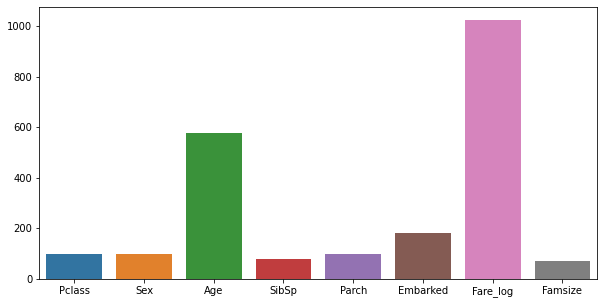

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

# Catboost

## 새로운 변수 생성
- 설명력이 높았던 변수의 조합?

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize
0,0,3,1,22.0,1,0,0,2.110213,1
1,1,1,0,38.0,1,0,1,4.280593,1
2,1,3,0,26.0,0,0,0,2.188856,0
3,1,1,0,35.0,1,0,0,3.990834,1
4,0,3,1,35.0,0,0,0,2.202765,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,0,2.639057,0
885,1,1,0,19.0,0,0,0,3.433987,0
886,0,3,0,11.0,1,2,0,3.196630,3
887,1,1,1,26.0,0,0,1,3.433987,0


In [ ]:
data['ID1']=data['Pclass'].astype(str)++data['Sex'].astype(str)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1
0,0,3,1,22.0,1,0,0,2.110213,1,31
1,1,1,0,38.0,1,0,1,4.280593,1,10
2,1,3,0,26.0,0,0,0,2.188856,0,30
3,1,1,0,35.0,1,0,0,3.990834,1,10
4,0,3,1,35.0,0,0,0,2.202765,0,31
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,0,2.639057,0,21
885,1,1,0,19.0,0,0,0,3.433987,0,10
886,0,3,0,11.0,1,2,0,3.196630,3,30
887,1,1,1,26.0,0,0,1,3.433987,0,11


In [ ]:
data.ID1.value_counts()

31    347
30    144
11    122
21    108
10     92
20     76
Name: ID1, dtype: int64

In [ ]:
x=data.drop(columns=['Survived','SibSp','Parch'])
y=data['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=15, shuffle=True,random_state=42)

In [ ]:
model = cb.CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.008661
0:	learn: 0.6874898	total: 1.15ms	remaining: 1.15s
1:	learn: 0.6824280	total: 2.23ms	remaining: 1.11s
2:	learn: 0.6777101	total: 3.25ms	remaining: 1.08s
3:	learn: 0.6725331	total: 4.61ms	remaining: 1.15s
4:	learn: 0.6677189	total: 5.82ms	remaining: 1.16s
5:	learn: 0.6624924	total: 7.06ms	remaining: 1.17s
6:	learn: 0.6571736	total: 8.33ms	remaining: 1.18s
7:	learn: 0.6526916	total: 9.43ms	remaining: 1.17s
8:	learn: 0.6480595	total: 10.5ms	remaining: 1.16s
9:	learn: 0.6442788	total: 11.3ms	remaining: 1.11s
10:	learn: 0.6393080	total: 12.5ms	remaining: 1.12s
11:	learn: 0.6353485	total: 13.4ms	remaining: 1.1s
12:	learn: 0.6314032	total: 14.6ms	remaining: 1.1s
13:	learn: 0.6276958	total: 15.5ms	remaining: 1.09s
14:	learn: 0.6243097	total: 16.6ms	remaining: 1.09s
15:	learn: 0.6205057	total: 17.9ms	remaining: 1.1s
16:	learn: 0.6167014	total: 19ms	remaining: 1.1s
17:	learn: 0.6132005	total: 20.1ms	remaining: 1.1s
18:	learn: 0.6096728	total: 21.1ms	remaining: 1.09s

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       401
           1       0.92      0.80      0.86       265

    accuracy                           0.89       666
   macro avg       0.90      0.88      0.89       666
weighted avg       0.90      0.89      0.89       666

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.84      0.79      0.81        75

    accuracy                           0.88       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.88      0.88      0.88       223



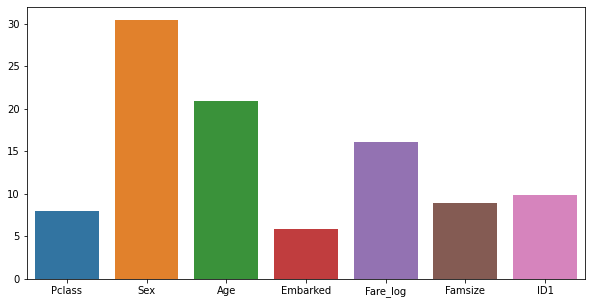

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, model.feature_importances_)

- ID1 변수 생성
- 영향력 작은 Sipsb와 Parch 컬럼 제거하여 트레이닝 결과
- validation acc : 0.88 
- 근데 catboost는 범주형변수일때 쓰기 좋은데 Age의 영향력이 좋다..

In [ ]:
data['ID2']=data['Sex'].astype(str)+data['Age'].astype(str)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,0,3,1,22.0,1,0,0,2.110213,1,31,122.0
1,1,1,0,38.0,1,0,1,4.280593,1,10,038.0
2,1,3,0,26.0,0,0,0,2.188856,0,30,026.0
3,1,1,0,35.0,1,0,0,3.990834,1,10,035.0
4,0,3,1,35.0,0,0,0,2.202765,0,31,135.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,0,2.639057,0,21,127.0
885,1,1,0,19.0,0,0,0,3.433987,0,10,019.0
886,0,3,0,11.0,1,2,0,3.196630,3,30,011.0
887,1,1,1,26.0,0,0,1,3.433987,0,11,126.0


In [ ]:
len(set(data.ID2))

145

In [ ]:
x=data.drop(columns=['Survived','SibSp','Parch'])
y=data['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=15, shuffle=True)

In [ ]:
model = cb.CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.008661
0:	learn: 0.6870256	total: 2.18ms	remaining: 2.18s
1:	learn: 0.6804578	total: 3.65ms	remaining: 1.82s
2:	learn: 0.6746201	total: 5.17ms	remaining: 1.72s
3:	learn: 0.6695232	total: 6.11ms	remaining: 1.52s
4:	learn: 0.6650926	total: 7.01ms	remaining: 1.4s
5:	learn: 0.6588366	total: 8.43ms	remaining: 1.4s
6:	learn: 0.6531429	total: 9.86ms	remaining: 1.4s
7:	learn: 0.6472070	total: 11.3ms	remaining: 1.4s
8:	learn: 0.6415099	total: 12.7ms	remaining: 1.4s
9:	learn: 0.6358782	total: 14.1ms	remaining: 1.4s
10:	learn: 0.6304054	total: 15.5ms	remaining: 1.39s
11:	learn: 0.6251015	total: 16.9ms	remaining: 1.39s
12:	learn: 0.6198105	total: 18.4ms	remaining: 1.39s
13:	learn: 0.6145132	total: 19.8ms	remaining: 1.39s
14:	learn: 0.6095923	total: 21.4ms	remaining: 1.4s
15:	learn: 0.6045803	total: 22.8ms	remaining: 1.4s
16:	learn: 0.6000423	total: 24ms	remaining: 1.39s
17:	learn: 0.5950208	total: 25.4ms	remaining: 1.39s
18:	learn: 0.5903687	total: 26.9ms	remaining: 1.39s
19

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       416
           1       0.93      0.84      0.88       250

    accuracy                           0.92       666
   macro avg       0.92      0.90      0.91       666
weighted avg       0.92      0.92      0.92       666

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       133
           1       0.84      0.72      0.78        90

    accuracy                           0.83       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



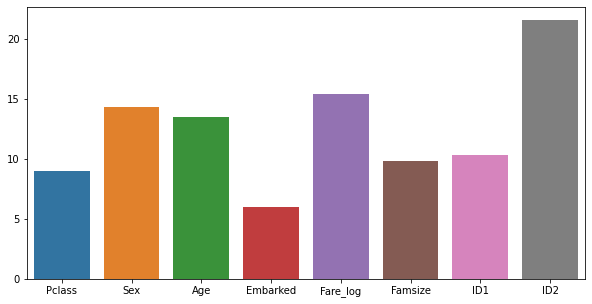

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, model.feature_importances_)

# XGBoost2

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,0,3,1,22.0,1,0,0,2.110213,1,31,122.0
1,1,1,0,38.0,1,0,1,4.280593,1,10,038.0
2,1,3,0,26.0,0,0,0,2.188856,0,30,026.0
3,1,1,0,35.0,1,0,0,3.990834,1,10,035.0
4,0,3,1,35.0,0,0,0,2.202765,0,31,135.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,0,2.639057,0,21,127.0
885,1,1,0,19.0,0,0,0,3.433987,0,10,019.0
886,0,3,0,11.0,1,2,0,3.196630,3,30,011.0
887,1,1,1,26.0,0,0,1,3.433987,0,11,126.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    int64  
 7   Fare_log  889 non-null    float64
 8   Famsize   889 non-null    int64  
 9   ID1       889 non-null    object 
 10  ID2       889 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 76.5+ KB


In [ ]:
data['ID1']=data['ID1'].astype(int)
data['ID2']=data['ID2'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    int64  
 7   Fare_log  889 non-null    float64
 8   Famsize   889 non-null    int64  
 9   ID1       889 non-null    int64  
 10  ID2       889 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 76.5 KB


In [ ]:
x=data.drop(columns=['Survived'])
y=data['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'objective': ['binary:hinge']
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5)
results=search.fit(x_train, y_train)

In [ ]:
print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'max_depth': 3, 'num_boost_rounds': 100, 'objective': 'binary:hinge'}
0.8274937290599652


In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       407
           1       0.87      0.82      0.84       259

    accuracy                           0.88       666
   macro avg       0.88      0.87      0.88       666
weighted avg       0.88      0.88      0.88       666

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       142
           1       0.66      0.78      0.71        81

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



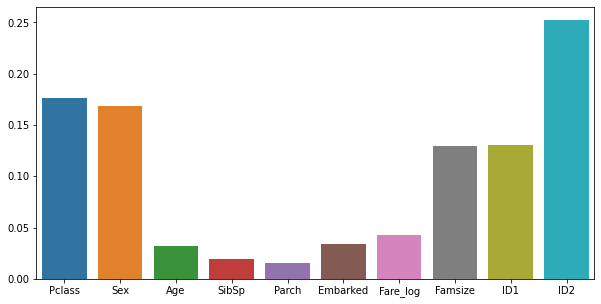

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

In [ ]:
x=data.drop(columns=['Survived','Age','SibSp','Parch'])
y=data['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'objective': ['binary:hinge']
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'max_depth': 7, 'num_boost_rounds': 100, 'objective': 'binary:hinge'}
0.822065017602692


In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       0.99      0.98      0.98       255

    accuracy                           0.99       666
   macro avg       0.99      0.98      0.99       666
weighted avg       0.99      0.99      0.99       666

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       138
           1       0.81      0.69      0.75        85

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



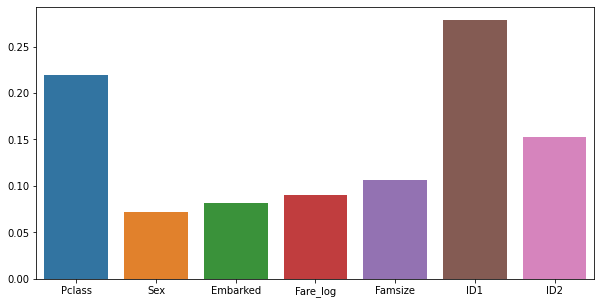

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

In [ ]:
xgb_params = {
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'max_depth' : 7,
    'min_child_weight' : 5,    
    'learning_rate' : 0.02,    
    'subsample' : 0.8,
    'lambda' : 0.05,
    'alpha' : 1,    
    'seed' : 2022,
}

model=xgb.XGBClassifier(**xgb_params, cv=15)
model.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric = 'logloss', eval_set = [(x_val, y_val)])


[0]	validation_0-logloss:0.6835
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.67371
[2]	validation_0-logloss:0.664349
[3]	validation_0-logloss:0.655349
[4]	validation_0-logloss:0.647031
[5]	validation_0-logloss:0.639101
[6]	validation_0-logloss:0.630865
[7]	validation_0-logloss:0.623079
[8]	validation_0-logloss:0.615376
[9]	validation_0-logloss:0.608241
[10]	validation_0-logloss:0.60141
[11]	validation_0-logloss:0.594827
[12]	validation_0-logloss:0.588488
[13]	validation_0-logloss:0.582176
[14]	validation_0-logloss:0.576321
[15]	validation_0-logloss:0.570648
[16]	validation_0-logloss:0.564682
[17]	validation_0-logloss:0.559329
[18]	validation_0-logloss:0.553684
[19]	validation_0-logloss:0.548761
[20]	validation_0-logloss:0.543706
[21]	validation_0-logloss:0.539438
[22]	validation_0-logloss:0.534796
[23]	validation_0-logloss:0.530079
[24]	validation_0-logloss:0.525847
[25]	validation_0-logloss:0.521259
[26]	validation_0-logloss:0.517257


XGBClassifier(alpha=1, cv=15, eval_metric='logloss', lambda=0.05,
              learning_rate=0.02, max_depth=7, min_child_weight=5, seed=2022,
              subsample=0.8)

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       414
           1       0.86      0.75      0.80       252

    accuracy                           0.86       666
   macro avg       0.86      0.84      0.85       666
weighted avg       0.86      0.86      0.86       666

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       135
           1       0.87      0.76      0.81        88

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



# TEST

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,32.0,0,0,359309,8.0500,S


In [ ]:
def preprocess(data):
  #의미없는 컬럼 삭제
  data=data.drop(['PassengerId','Name', 'Ticket'], axis=1)

  #인코딩
  le = LabelEncoder()
  data['Sex'] = le.fit_transform(data['Sex'])
  data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

  #요금 로그
  data['Fare_log']=np.log1p(data['Fare'])
  data=data.drop(['Fare'], axis=1)

  #가족
  data['Famsize']=data['Parch']+data['SibSp']

  #새로운 변수
  data['ID1']=data['Pclass'].astype(str)+data['Sex'].astype(str)
  data['ID2']=data['Sex'].astype(str)+data['Age'].astype(str)
  data['ID1']=data['ID1'].astype(int)
  data['ID2']=data['ID2'].astype(float)

  return data

In [ ]:
test=preprocess(test)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,3,1,34.5,0,0,2,2.178064,0,31,134.5
1,3,0,47.0,1,0,0,2.079442,1,30,47.0
2,2,1,62.0,0,0,2,2.369075,0,21,162.0
3,3,1,27.0,0,0,0,2.268252,0,31,127.0
4,3,0,22.0,1,1,0,2.586824,2,30,22.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,32.0,0,0,0,2.202765,0,31,132.0
414,1,0,39.0,0,0,1,4.699571,0,10,39.0
415,3,1,38.5,0,0,0,2.110213,0,31,138.5
416,3,1,32.0,0,0,0,2.202765,0,31,132.0


In [ ]:
test_x = test[['Pclass', 'Sex', 'Embarked', 'Fare_log', 'Famsize', 'ID1', 'ID2']]
test_y_pred = model.predict(test_x)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/dacon/타이타닉/data/submission.csv")
submission['Survived'] = test_y_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('/content/drive/MyDrive/dacon/타이타닉/data/submission_1.csv', index = False)

결과 : 0.75399(453등)